# Sales analysis using mock data 

In [2]:
import pandas as pd
import os 

## Merging Data

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

data_merged = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    data_merged = pd.concat([data_merged, df])

data_merged.to_csv('data_merged.csv', index=False, sep=',')


## Read merged, clean duplicates and empty rows

In [4]:
df = pd.read_csv('data_merged.csv')
df = df.drop_duplicates().dropna()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Get rid of the 'OR' value from the order date column

In [5]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Add Month column convert it to an integer and then to Date

In [6]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April


## What was the most profitable month?

In [7]:
df['Sales'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
monthly_sales = df.groupby('Month').sum()
display(monthly_sales['Sales'])

Month
April        3389217.98
August       2241083.37
December     4608295.70
February     2200078.08
January      1821413.16
July         2646461.32
June         2576280.15
March        2804973.35
May          3150616.23
November     3197875.05
October      3734777.86
September    2094465.69
Name: Sales, dtype: float64

## Plotting the data

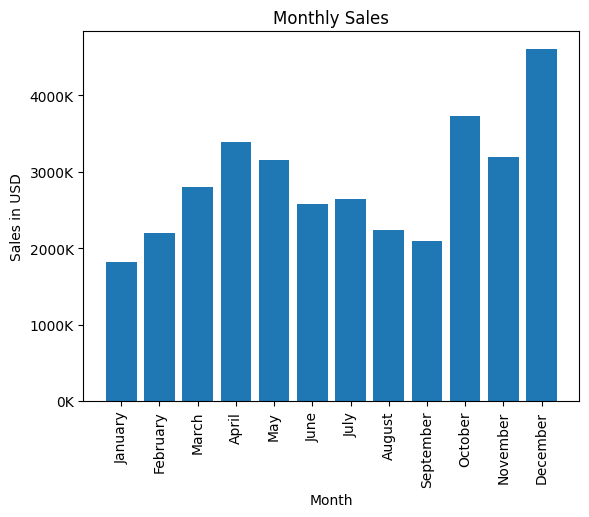

In [8]:
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import FuncFormatter

monthly_sales = df.groupby('Month').sum()
months = list(calendar.month_name[1:])
monthly_sales = monthly_sales.reindex(months)

plt.bar(months, monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.title('Monthly Sales')
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

# What city had the highest number of sales?

In [9]:
#df['City'] = df['Purchase Address'].str.extract(r',\s*([^,]+),')
#df.head()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA)


## Sales by city

In [10]:
city_sales = df.groupby('City').sum()
display(city_sales['Sales'])

City
Atlanta (GA)          2794199.07
Austin (TX)           1818044.33
Boston (MA)           3658627.65
Dallas (TX)           2765373.96
Los Angeles (CA)      5448304.28
New York City (NY)    4661867.14
Portland (ME)          449321.38
Portland (OR)         1870010.56
San Francisco (CA)    8254743.55
Seattle (WA)          2745046.02
Name: Sales, dtype: float64

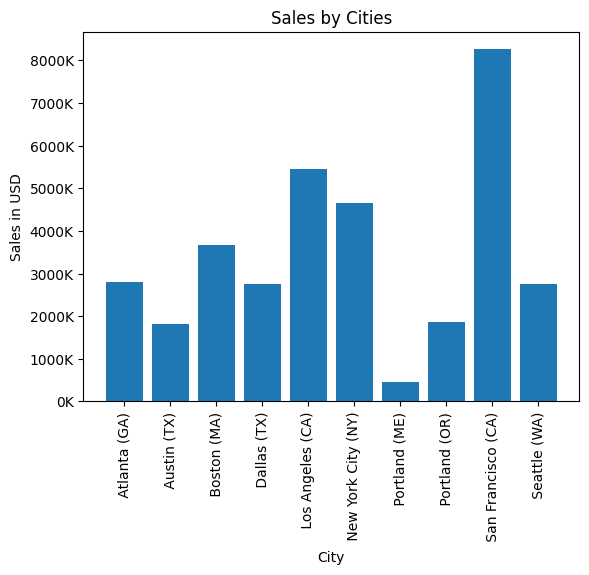

In [11]:
cities = [city for city, df in df.groupby('City')]

plt.bar(cities ,city_sales['Sales'])
plt.xticks(rotation=90) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K')) 

plt.title('Sales by Cities')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

## Whats time should we display advertisements to maximize customer churn rates?

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipykernel_2502539/3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [13]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles (CA),9,27


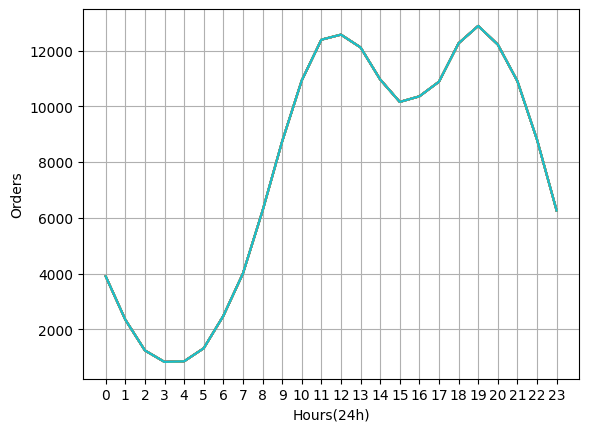

In [14]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.grid()
plt.xlabel('Hours(24h)')
plt.ylabel('Orders')
plt.xticks(hours)
plt.show()


## Which products are most often sold together?

In [15]:
bundled = df[df['Order ID'].duplicated(keep=False)]

bundled['Grouped'] = bundled.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

bundled = bundled[['Order ID','Grouped']].drop_duplicates()
bundled.head(20)


/tmp/ipykernel_2502539/28198062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundled['Grouped'] = bundled.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"
250,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [16]:
from itertools import combinations
from collections import Counter

count = Counter() 

for row in bundled['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


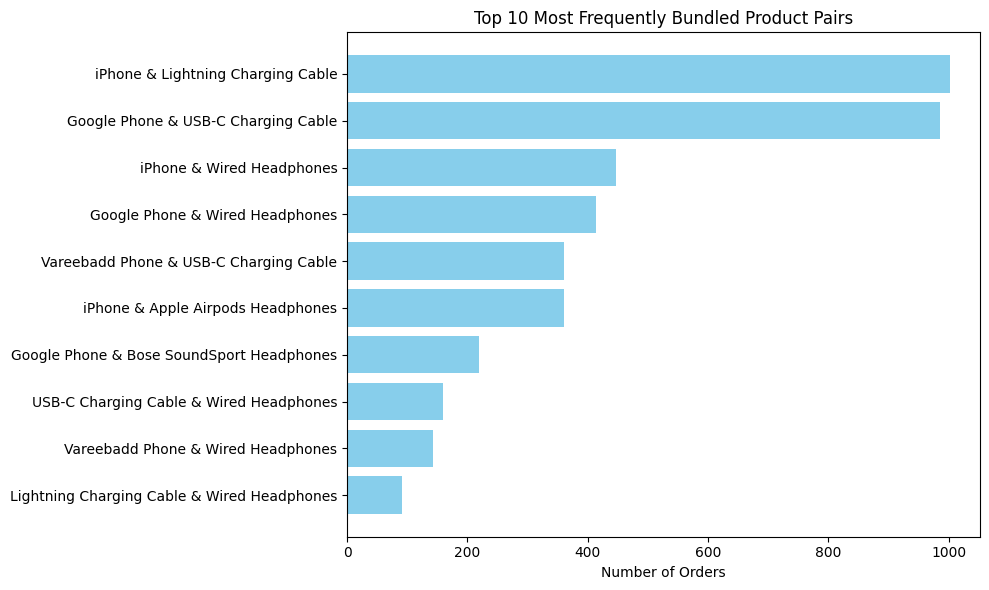

In [ ]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

count = Counter()

for row in bundled['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

top_pairs = count.most_common(10)

pairs = [f"{a} & {b}" for (a, b), _ in top_pairs]
frequencies = [freq for _, freq in top_pairs]

plt.figure(figsize=(10, 6))
plt.barh(pairs, frequencies, color='skyblue')
plt.xlabel('Number of Orders')
plt.title('Top 10 Most Frequently Bundled Product Pairs')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

## What products sold the most

In [18]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
product_group = df.drop('Order Date', axis=1).groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
display(quantity_ordered)

Product
20in Monitor                   4126.0
27in 4K Gaming Monitor         6239.0
27in FHD Monitor               7541.0
34in Ultrawide Monitor         6192.0
AA Batteries (4-pack)         27615.0
AAA Batteries (4-pack)        30986.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
Flatscreen TV                  4813.0
Google Phone                   5529.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23169.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
USB-C Charging Cable          23931.0
Vareebadd Phone                2068.0
Wired Headphones              20524.0
iPhone                         6847.0
Name: Quantity Ordered, dtype: float64

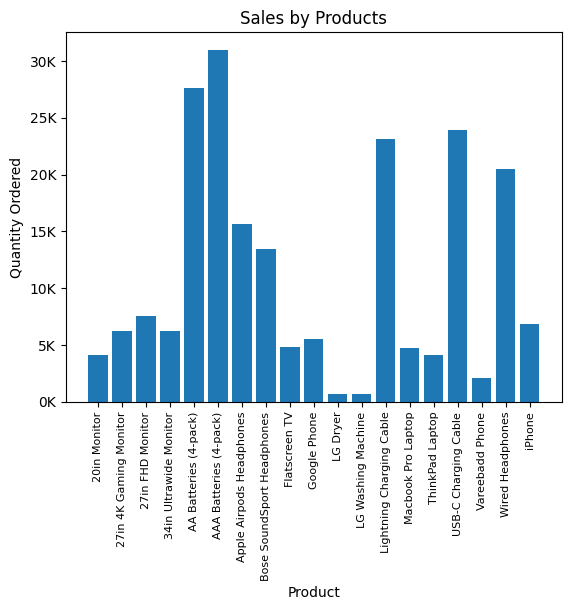

In [19]:
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90, size=8) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}K')) 

plt.title('Sales by Products')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

/tmp/ipykernel_2502539/2826039982.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


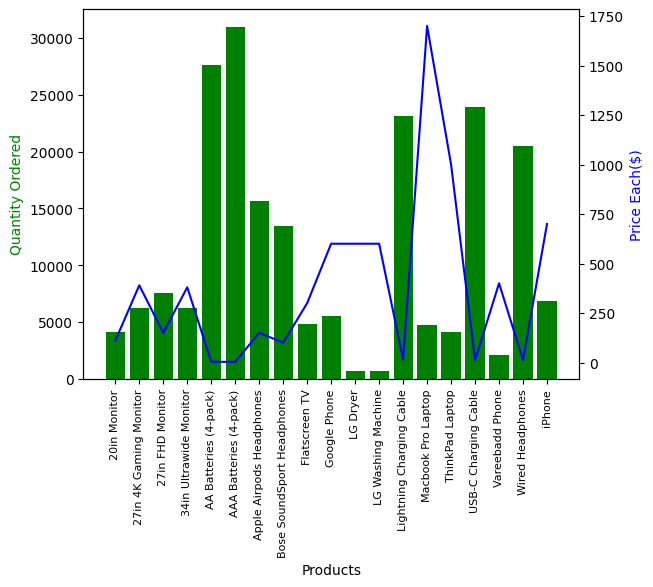

In [20]:
df['Price Each'] = df['Price Each'].astype(float)
prices = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices,'-b')

ax1.set_xlabel('Products')
ax1.set_xticklabels(products,rotation='vertical',size=8)
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each($)', color='b')

plt.show()